In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import plotly.express as px
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Read data 

In [2]:
car = pd.read_csv("../input/car-price-prediction/CarPrice_Assignment.csv" , sep = "," , encoding = 'utf-8')

In [3]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Understanding columns 

In [4]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

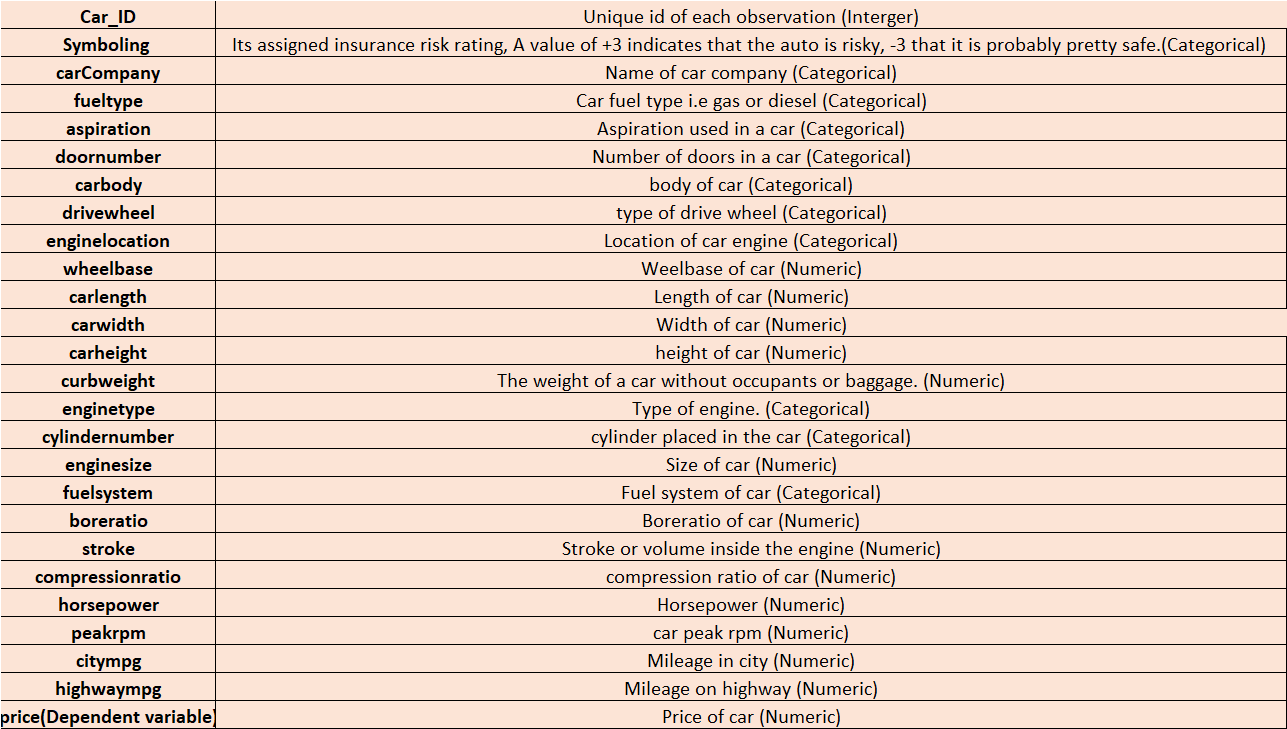

In [5]:
car.head(23)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


# 1. EDA 

## a) What is the range of prices 

<AxesSubplot:xlabel='price', ylabel='Count'>

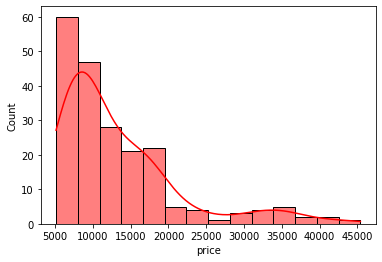

In [6]:
sns.histplot(data=car, x="price", kde=True, color = "red")

## b) What is the most type of drive wheel in the cars ?

In [7]:
car['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

<AxesSubplot:ylabel='drivewheel'>

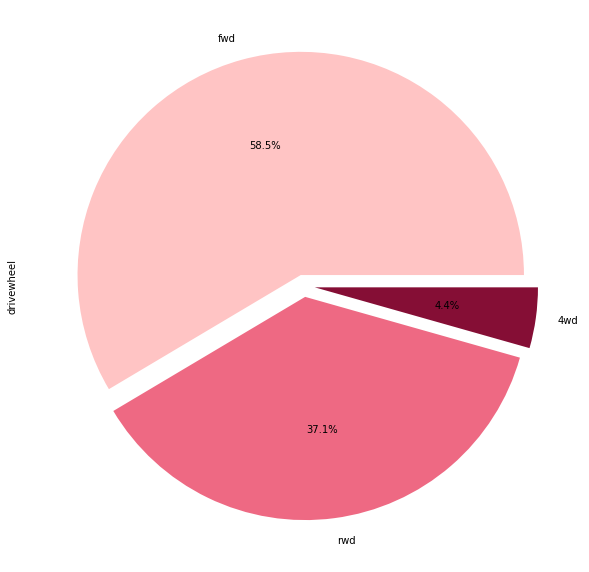

In [8]:
round(car['drivewheel'].value_counts()/ car.shape[0]*100,2).plot.pie(autopct = '%1.1f%%',figsize =(10,20),
explode=(0.05,0.05,0.05),colors=['#FFC4C4','#EE6983','#850E35'])

## c) What is the relationship with car body and the car price ?


<AxesSubplot:xlabel='carbody', ylabel='price'>

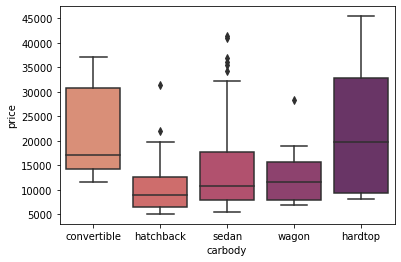

In [9]:
sns.boxplot(x="carbody", y="price", data=car,palette="flare")

## d) Does the doors number affect on engine location ?

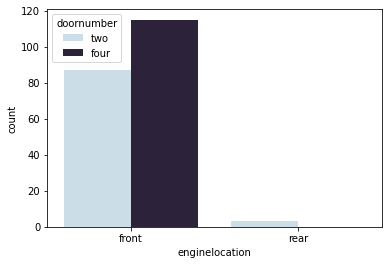

In [10]:
ax = sns.countplot(x="enginelocation", hue="doornumber", data=car,palette="ch:s=.25,rot=-.25")

#### NO

## e) Is fuel type dose related to the car price ?

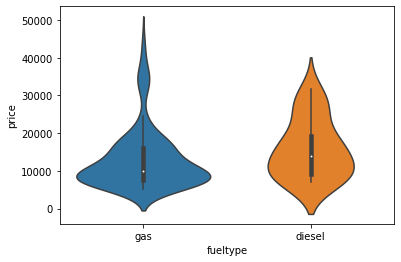

In [11]:
ax = sns.violinplot(x="fueltype", y="price", data=car)

## f) Is there a relation between fuel system and price?


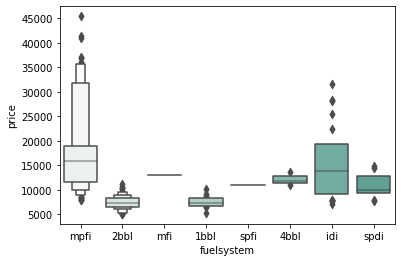

In [12]:
ax = sns.boxenplot(x="fuelsystem", y="price", data=car, palette="light:#5A9" )

## g) What is the ratio between four and two doors in cars?


In [13]:
car['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

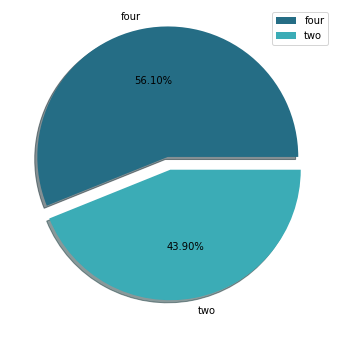

In [14]:
plt.figure(figsize= (10, 6))
data  = [115  , 90]
labels = ["four", "two"]
explode = [0.1, 0]
plt.pie(data ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

## h) What is mean of engine size  ?

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

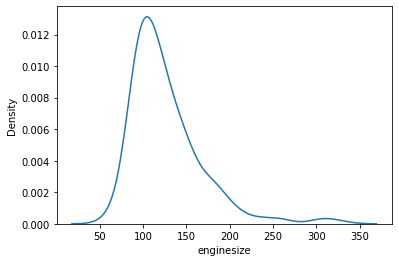

In [15]:
sns.kdeplot(data=car, x="enginesize")

In [16]:
car['enginesize'].mean()

126.90731707317073

## i) Is the engine location related to car price ?

<AxesSubplot:xlabel='price', ylabel='Count'>

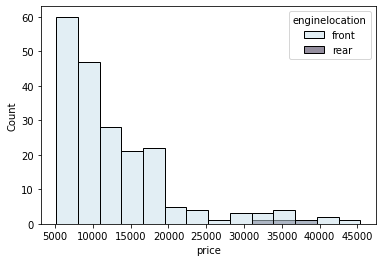

In [17]:
sns.histplot(data=car, x="price", hue="enginelocation", palette="ch:s=.25,rot=-.25")


## j) What is the relation between cylinder number and price?

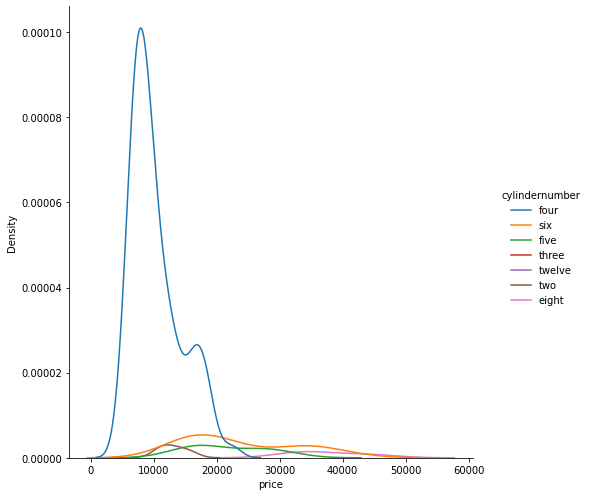

In [18]:
sns.displot(data=car, x="price", hue="cylindernumber",height=7,kind='kde')

## k) which engine type better on city ?

<AxesSubplot:xlabel='enginetype', ylabel='citympg'>

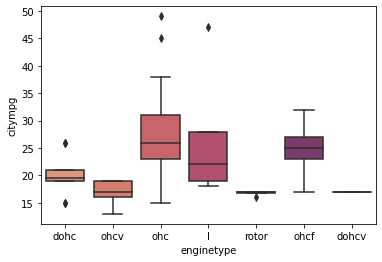

In [19]:
sns.boxplot(x="enginetype", y="citympg", data=car,palette="flare")

## l) which engine type better on high way ? 

<AxesSubplot:xlabel='enginetype', ylabel='highwaympg'>

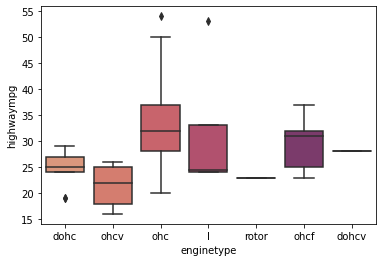

In [20]:
sns.boxplot(x="enginetype", y="highwaympg", data=car,palette="flare")

# 2. Data preprocessing

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## a. Check nulls 

In [22]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

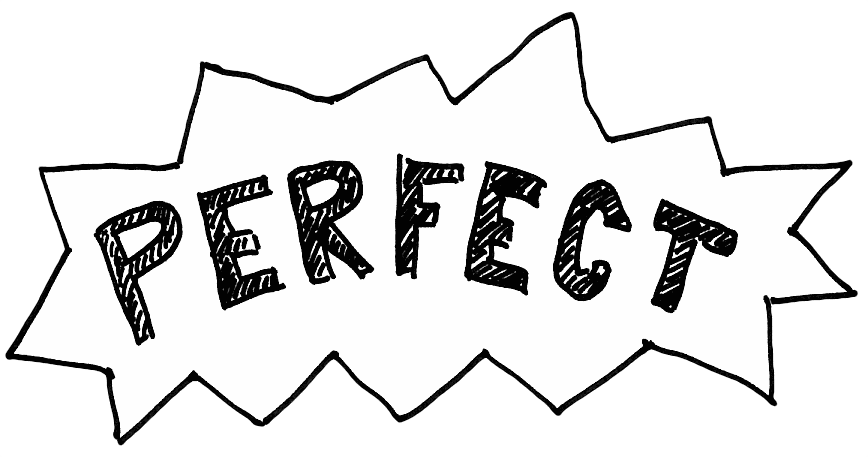

## b. Check outliers  

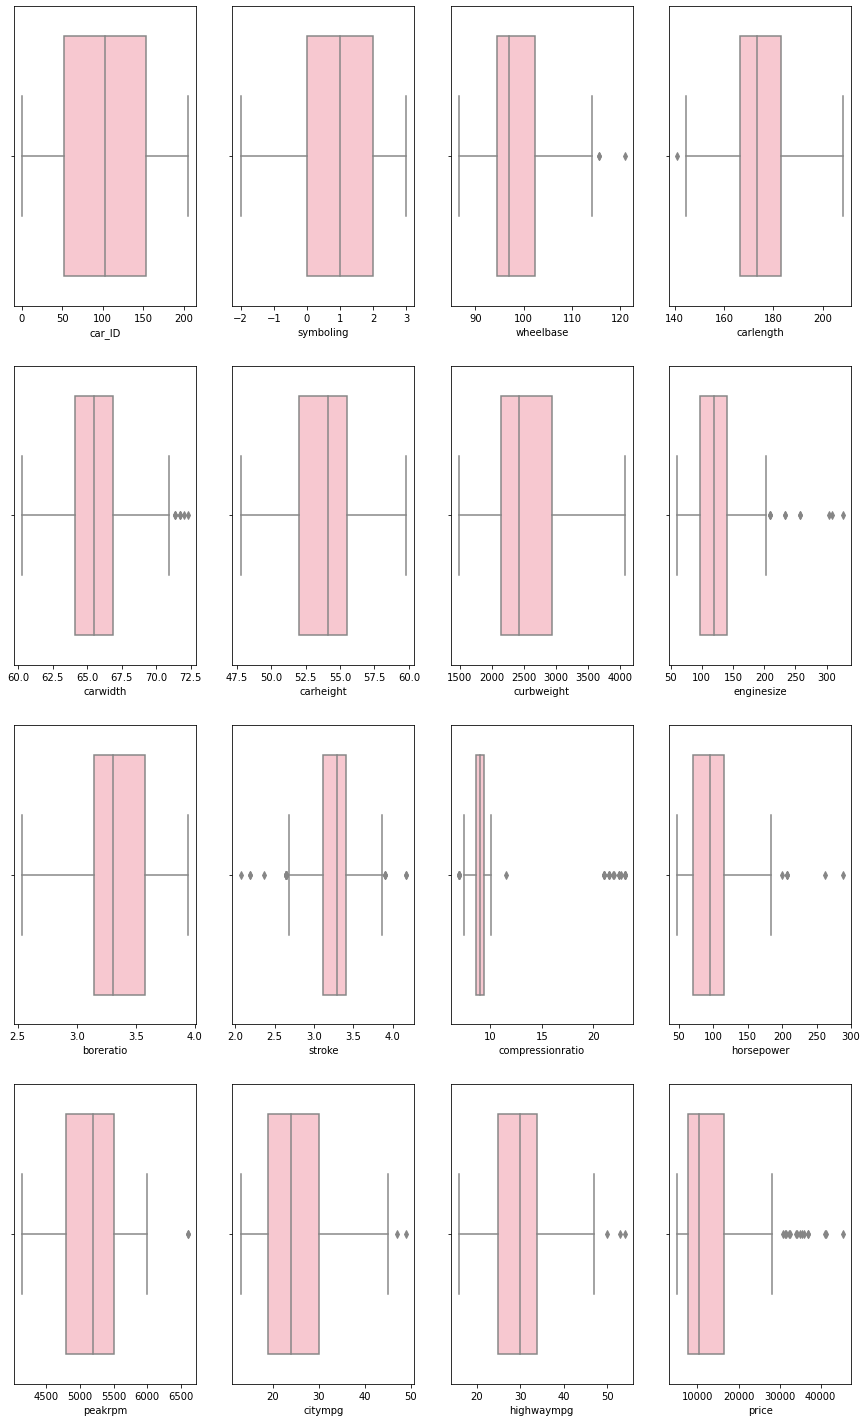

In [23]:
num_cols = list(car.select_dtypes(exclude='object').columns)
plt.figure(figsize=(15, 65))
for i in range(len(num_cols)):
    if i == 26:
        break
    else:
        plt.subplot(10,4, i+1)
        l = num_cols[i]
        sns.boxplot(car[l], color="pink" )

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

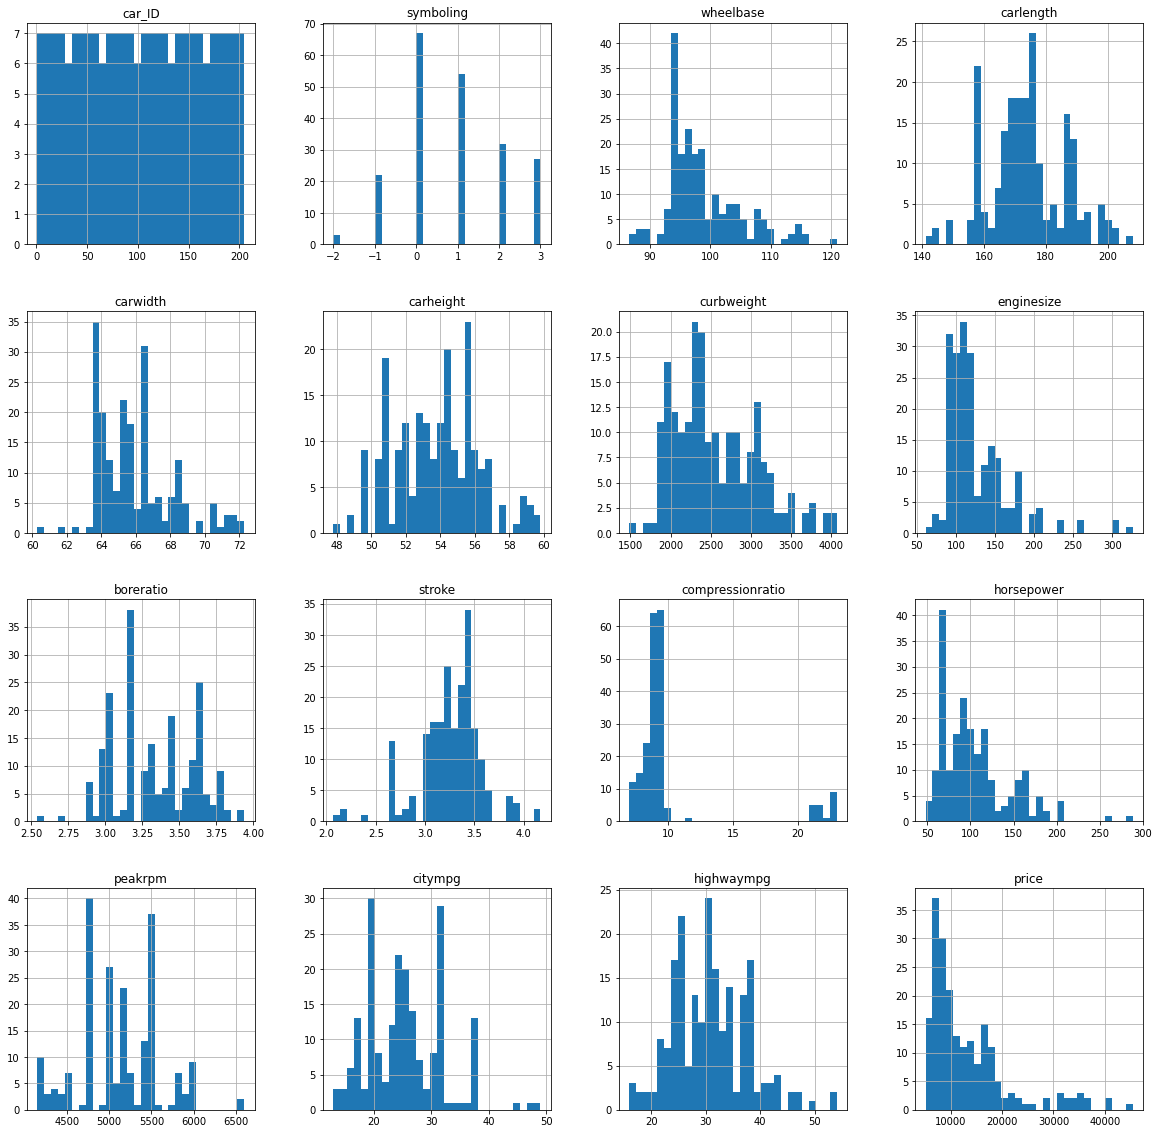

In [24]:
car.hist(bins=30,figsize=[20,20])

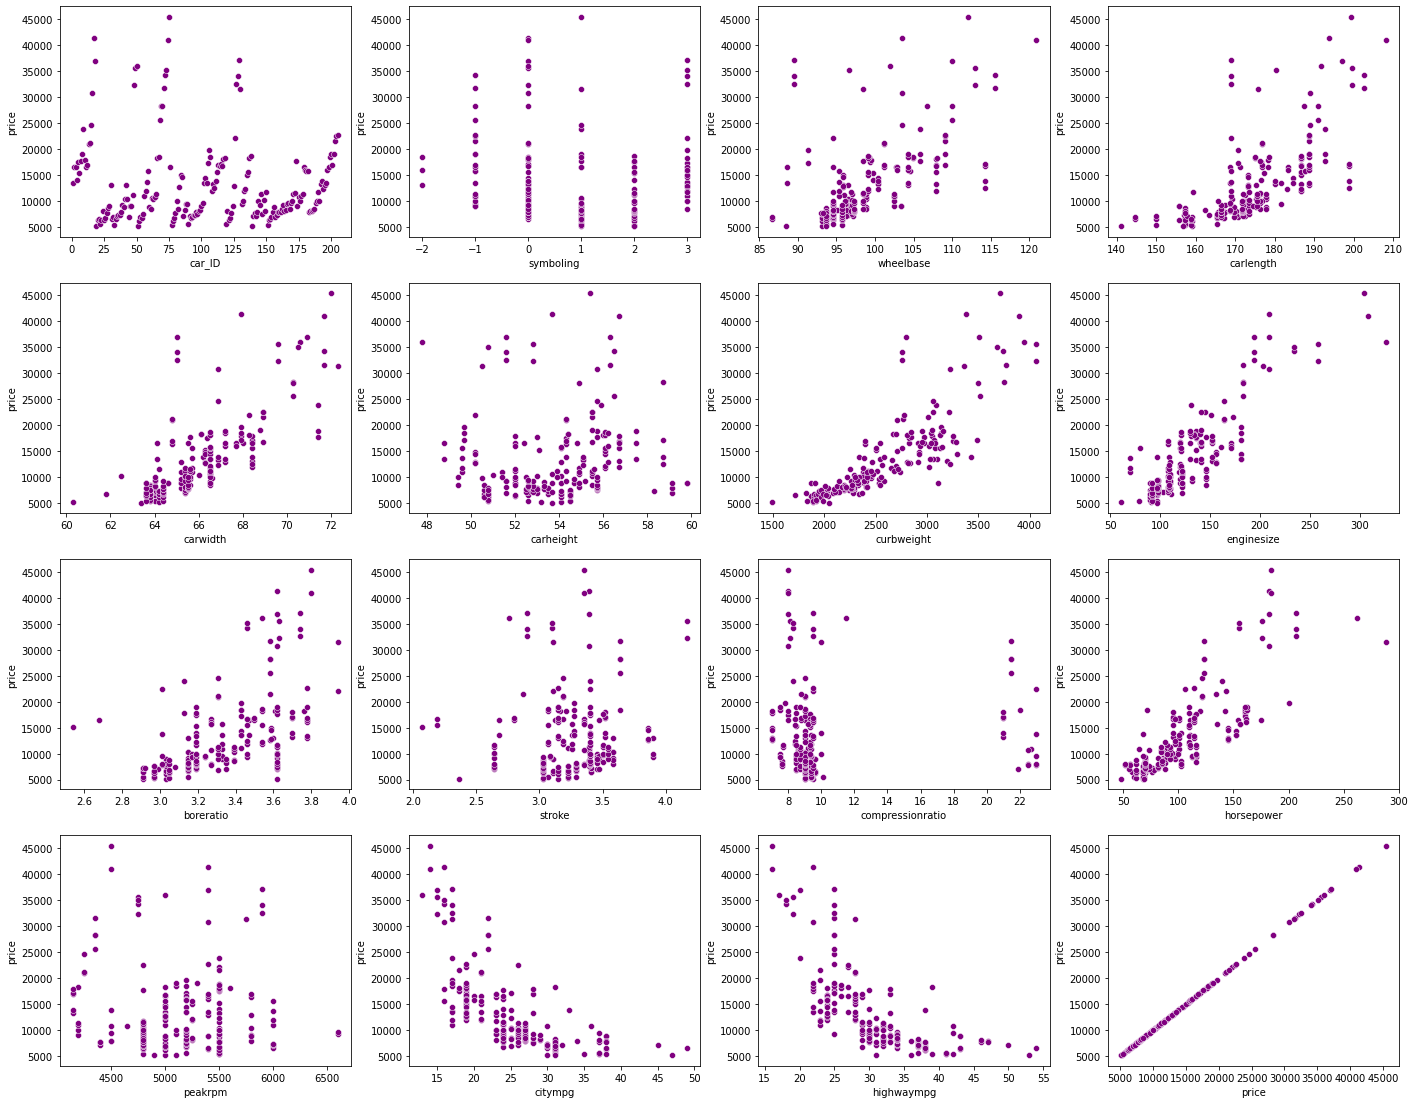

In [25]:
num_cols = list(car.select_dtypes(exclude='object').columns)
plt.figure(figsize=(24, 50))
for i in range(len(num_cols)):
    if i == 26:
        break
    else:
        plt.subplot(10,4, i+1)
        sns.scatterplot(data=car, x=num_cols[i], y='price' , color ="purple")

In [26]:
car["fueltype"].describe()

count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object

In [27]:
car["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<AxesSubplot:xlabel='fueltype', ylabel='Count'>

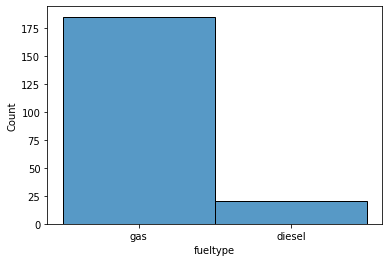

In [28]:
sns.histplot(data=car, x="fueltype")

In [29]:
# we can delet this coloums because more than 90 % of data is gas 
del car['fueltype']

In [30]:
car

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [31]:
car["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [32]:
# we can delet this coloums because more than 98 % of data is front     
del car['enginelocation']

## c. drop outliers 

<AxesSubplot:xlabel='horsepower'>

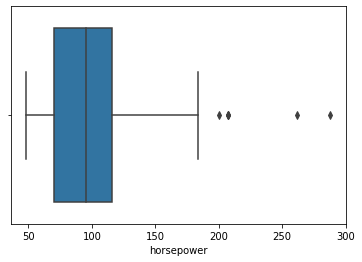

In [33]:
sns.boxplot(car['horsepower'])

In [34]:
# element outliers in horsepower 
firstQ_tb = car['horsepower'].quantile(0.25)
thirdQ_tb = car['horsepower'].quantile(0.75)
IQR_tb = thirdQ_tb - firstQ_tb
IQR_tb

46.0

In [35]:
newB_tb = thirdQ_tb + 3*(IQR_tb)
newB_tb

254.0

In [36]:
car[car['horsepower']>newB_tb].value_counts()

car_ID  symboling  CarName          aspiration  doornumber  carbody    drivewheel  wheelbase  carlength  carwidth  carheight  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  
50      0          jaguar xk        std         two         sedan      rwd         102.0      191.7      70.6      47.8       3950        ohcv        twelve          326         mpfi        3.54       2.76    11.5              262         5000     13       17          36000.0    1
130     1          porsche cayenne  std         two         hatchback  rwd         98.4       175.7      72.3      50.5       3366        dohcv       eight           203         mpfi        3.94       3.11    10.0              288         5750     17       28          31400.5    1
dtype: int64

In [37]:
car.drop(car[car['horsepower']>newB_tb].index, axis = 0, inplace =True)
car.shape

(203, 24)

In [38]:
car

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,std,four,sedan,fwd,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,std,four,sedan,4wd,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),std,four,sedan,rwd,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,turbo,four,sedan,rwd,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,std,four,sedan,rwd,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,turbo,four,sedan,rwd,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:xlabel='compressionratio'>

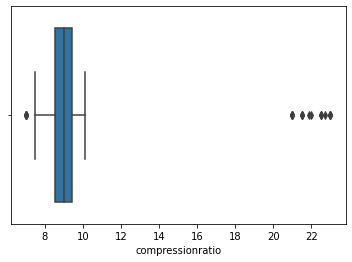

In [39]:
sns.boxplot(car['compressionratio'])

In [40]:
# element outliers in compressionratio 
firstQ_tb = car['compressionratio'].quantile(0.25)
thirdQ_tb = car['compressionratio'].quantile(0.75)
IQR_tb = thirdQ_tb - firstQ_tb
IQR_tb

0.8499999999999996

In [41]:
newB_tb = thirdQ_tb + 3*(IQR_tb)
newB_tb

11.95

In [42]:
car[car['compressionratio']>newB_tb].value_counts()

car_ID  symboling  CarName                    aspiration  doornumber  carbody    drivewheel  wheelbase  carlength  carwidth  carheight  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  
64       0         mazda glc deluxe           std         four        sedan      fwd         98.8       177.8      66.5      55.5       2443        ohc         four            122         idi         3.39       3.39    22.7              64          4650     36       42          10795.0    1
67       0         mazda rx-7 gs              std         four        sedan      rwd         104.9      175.0      66.1      54.4       2700        ohc         four            134         idi         3.43       3.64    22.0              72          4200     31       39          18344.0    1
193      0         volkswagen rabbit custom   turbo       four        sedan      fwd         100.4      180.2      66.9      55.1

In [43]:
car.drop(car[car['compressionratio']>newB_tb].index, axis = 0, inplace =True)
car.shape

(183, 24)

<AxesSubplot:xlabel='enginesize'>

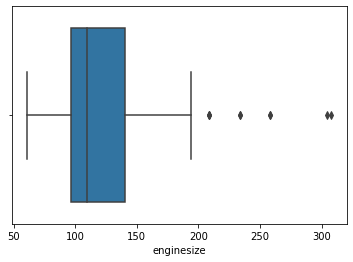

In [44]:
sns.boxplot(car['enginesize'])

In [45]:
# element outliers in enginesize 
firstQ_tb = car['enginesize'].quantile(0.25)
thirdQ_tb = car['enginesize'].quantile(0.75)
IQR_tb = thirdQ_tb - firstQ_tb
IQR_tb

43.5

In [46]:
newB_tb = thirdQ_tb + 3*(IQR_tb)
newB_tb
car[car['enginesize']>newB_tb].value_counts()
car.drop(car[car['enginesize']>newB_tb].index, axis = 0, inplace =True)
car.shape

(181, 24)

## d. Check after handling outliers

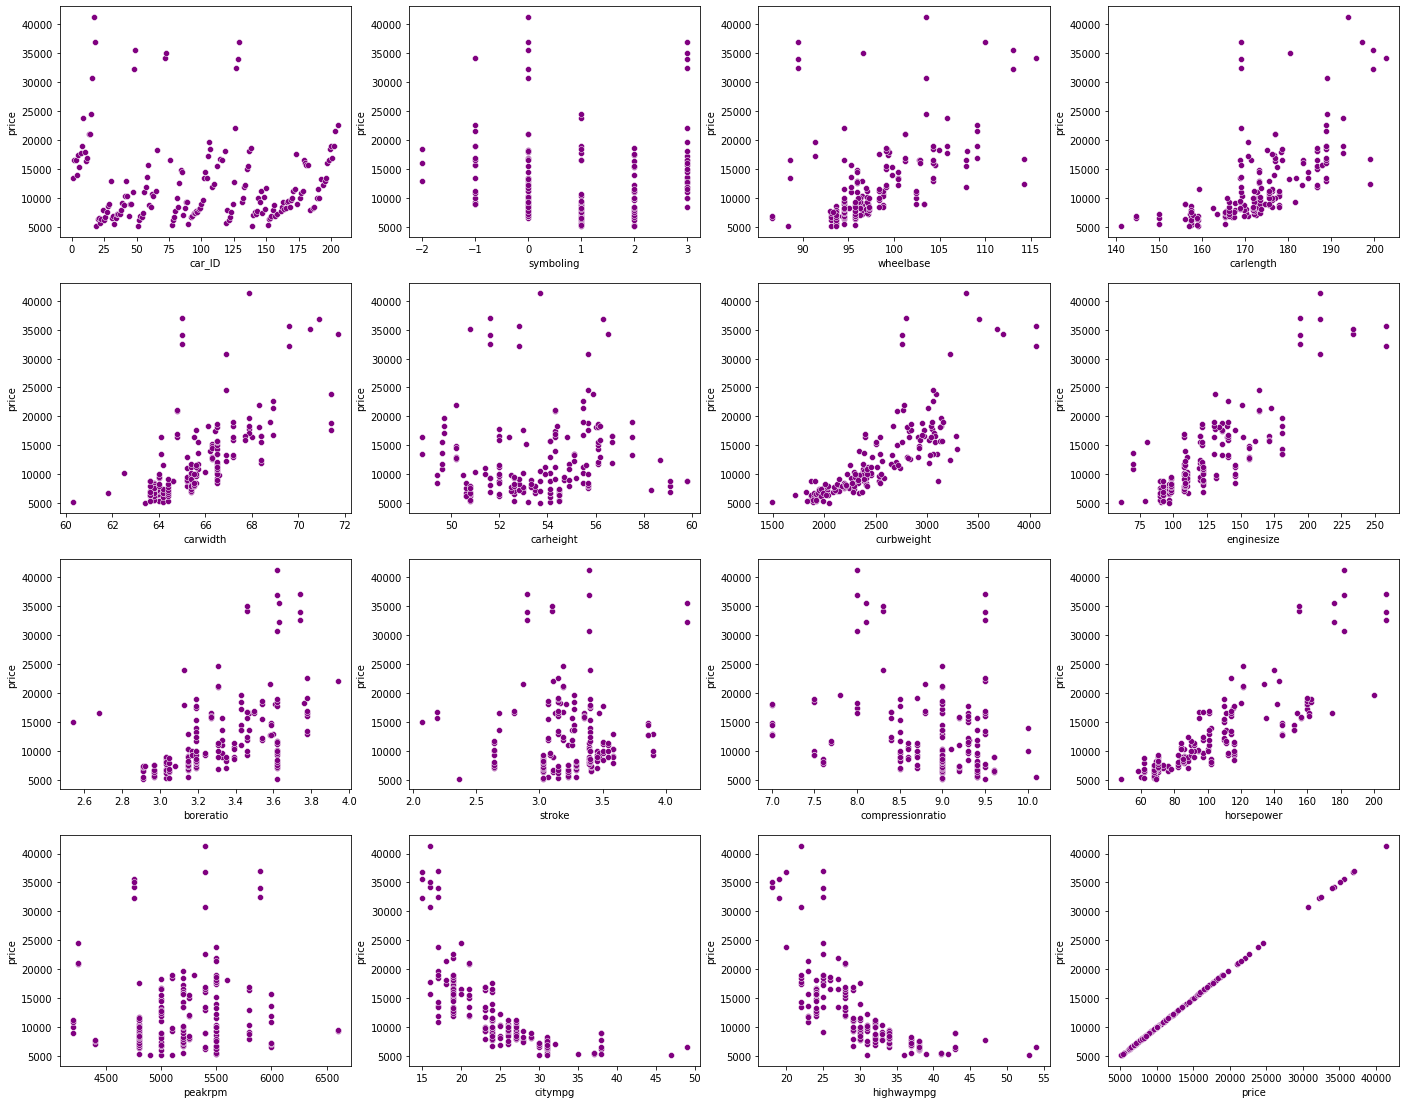

In [47]:
num_cols = list(car.select_dtypes(exclude='object').columns)
plt.figure(figsize=(24, 50))
for i in range(len(num_cols)):
    if i == 26:
        break
    else:
        plt.subplot(10,4, i+1)
        sns.scatterplot(data=car, x=num_cols[i], y='price' , color ="purple")

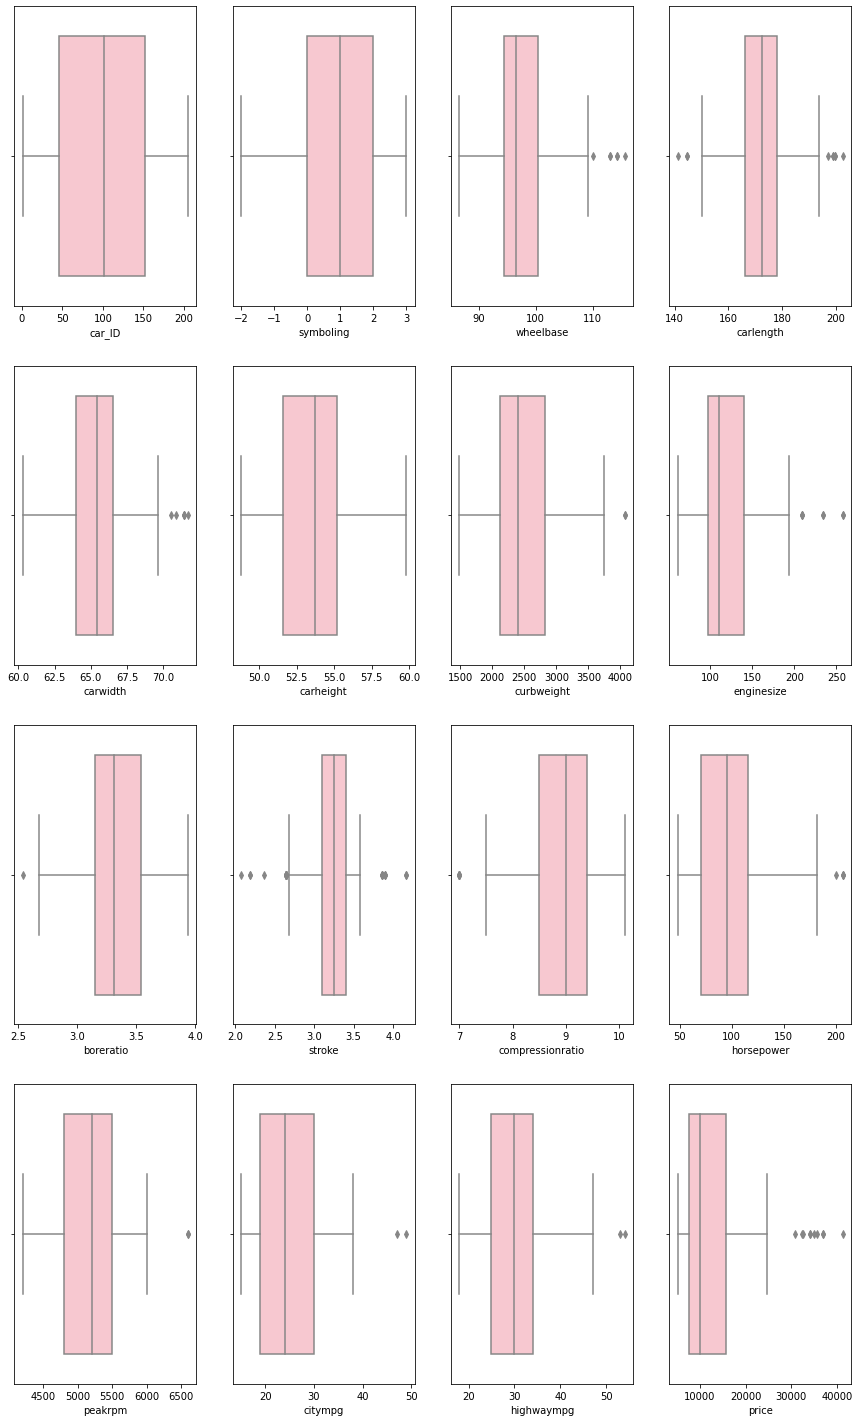

In [48]:
num_cols = list(car.select_dtypes(exclude='object').columns)
plt.figure(figsize=(15, 65))
for i in range(len(num_cols)):
    if i == 26:
        break
    else:
        plt.subplot(10,4, i+1)
        l = num_cols[i]
        sns.boxplot(car[l], color="pink" )

## e. Encoding Data

In [49]:
car.select_dtypes('object')

,CarName,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,std,two,convertible,rwd,dohc,four,mpfi
1,alfa-romero stelvio,std,two,convertible,rwd,dohc,four,mpfi
2,alfa-romero Quadrifoglio,std,two,hatchback,rwd,ohcv,six,mpfi
3,audi 100 ls,std,four,sedan,fwd,ohc,four,mpfi
4,audi 100ls,std,four,sedan,4wd,ohc,five,mpfi
...,...,...,...,...,...,...,...,...
199,volvo diesel,turbo,four,wagon,rwd,ohc,four,mpfi
200,volvo 145e (sw),std,four,sedan,rwd,ohc,four,mpfi
201,volvo 144ea,turbo,four,sedan,rwd,ohc,four,mpfi
202,volvo 244dl,std,four,sedan,rwd,ohcv,six,mpfi


In [50]:
car['drivewheel'].value_counts()

fwd    111
rwd     61
4wd      9
Name: drivewheel, dtype: int64

In [51]:
le = LabelEncoder()
drivewheel_le = LabelEncoder()
car['drivewheel'] = drivewheel_le.fit_transform(car['drivewheel'])

In [52]:
car['drivewheel'].value_counts()
# fwd --> 1 , rwd --> 2 , 4wd --> 0

1    111
2     61
0      9
Name: drivewheel, dtype: int64

In [53]:
car.select_dtypes('object')

,CarName,aspiration,doornumber,carbody,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,std,two,convertible,dohc,four,mpfi
1,alfa-romero stelvio,std,two,convertible,dohc,four,mpfi
2,alfa-romero Quadrifoglio,std,two,hatchback,ohcv,six,mpfi
3,audi 100 ls,std,four,sedan,ohc,four,mpfi
4,audi 100ls,std,four,sedan,ohc,five,mpfi
...,...,...,...,...,...,...,...
199,volvo diesel,turbo,four,wagon,ohc,four,mpfi
200,volvo 145e (sw),std,four,sedan,ohc,four,mpfi
201,volvo 144ea,turbo,four,sedan,ohc,four,mpfi
202,volvo 244dl,std,four,sedan,ohcv,six,mpfi


In [54]:
car['doornumber'].value_counts()

four    97
two     84
Name: doornumber, dtype: int64

In [55]:
le = LabelEncoder()
doornumber_le = LabelEncoder()
car['doornumber'] = doornumber_le.fit_transform(car['doornumber'])

In [56]:
car['doornumber'].value_counts()
# four --> 0 , two --> 1

0    97
1    84
Name: doornumber, dtype: int64

In [57]:
car['aspiration'].value_counts()

std      157
turbo     24
Name: aspiration, dtype: int64

In [58]:
le = LabelEncoder()
aspiration_le = LabelEncoder()
car['aspiration'] = aspiration_le.fit_transform(car['aspiration'])

In [59]:
car['aspiration'].value_counts()
# std --> 0 , turbo --> 1

0    157
1     24
Name: aspiration, dtype: int64

In [60]:
car.select_dtypes('object')

,CarName,carbody,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,convertible,dohc,four,mpfi
1,alfa-romero stelvio,convertible,dohc,four,mpfi
2,alfa-romero Quadrifoglio,hatchback,ohcv,six,mpfi
3,audi 100 ls,sedan,ohc,four,mpfi
4,audi 100ls,sedan,ohc,five,mpfi
...,...,...,...,...,...
199,volvo diesel,wagon,ohc,four,mpfi
200,volvo 145e (sw),sedan,ohc,four,mpfi
201,volvo 144ea,sedan,ohc,four,mpfi
202,volvo 244dl,sedan,ohcv,six,mpfi


In [61]:
car['fuelsystem'].value_counts()

mpfi    90
2bbl    66
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [62]:
le = LabelEncoder()
fuelsystem_le = LabelEncoder()
car['fuelsystem'] = fuelsystem_le.fit_transform(car['fuelsystem'])

In [63]:
car['fuelsystem'].value_counts()

4    90
1    66
0    11
5     9
2     3
3     1
6     1
Name: fuelsystem, dtype: int64

In [64]:
car.select_dtypes('object')

,CarName,carbody,enginetype,cylindernumber
0,alfa-romero giulia,convertible,dohc,four
1,alfa-romero stelvio,convertible,dohc,four
2,alfa-romero Quadrifoglio,hatchback,ohcv,six
3,audi 100 ls,sedan,ohc,four
4,audi 100ls,sedan,ohc,five
...,...,...,...,...
199,volvo diesel,wagon,ohc,four
200,volvo 145e (sw),sedan,ohc,four
201,volvo 144ea,sedan,ohc,four
202,volvo 244dl,sedan,ohcv,six


In [65]:
car['enginetype'].value_counts()

ohc      133
ohcf      15
dohc      12
ohcv      10
l          7
rotor      4
Name: enginetype, dtype: int64

In [66]:
le = LabelEncoder()
enginetype_le = LabelEncoder()
car['enginetype'] = enginetype_le.fit_transform(car['enginetype'])

In [67]:
car['enginetype'].value_counts()

2    133
3     15
0     12
4     10
1      7
5      4
Name: enginetype, dtype: int64

In [68]:
car['cylindernumber'].value_counts()

four     144
six       23
five       7
two        4
eight      2
three      1
Name: cylindernumber, dtype: int64

In [69]:
le = LabelEncoder()
cylindernumber_le = LabelEncoder()
car['cylindernumber'] = cylindernumber_le.fit_transform(car['cylindernumber'])

In [70]:
car['cylindernumber'].value_counts()

2    144
3     23
1      7
5      4
0      2
4      1
Name: cylindernumber, dtype: int64

In [71]:
car.select_dtypes('object')

,CarName,carbody
0,alfa-romero giulia,convertible
1,alfa-romero stelvio,convertible
2,alfa-romero Quadrifoglio,hatchback
3,audi 100 ls,sedan
4,audi 100ls,sedan
...,...,...
199,volvo diesel,wagon
200,volvo 145e (sw),sedan
201,volvo 144ea,sedan
202,volvo 244dl,sedan


In [72]:
car['carbody'].value_counts()

sedan          79
hatchback      68
wagon          22
convertible     6
hardtop         6
Name: carbody, dtype: int64

In [73]:
le = LabelEncoder()
carbody_le = LabelEncoder()
car['carbody'] = carbody_le.fit_transform(car['carbody'])

In [74]:
car['carbody'].value_counts()

3    79
2    68
4    22
0     6
1     6
Name: carbody, dtype: int64

In [75]:
car['CarName'].value_counts()

toyota corona          5
toyota corolla         5
peugeot 504            4
subaru dl              4
mazda 626              3
                      ..
maxda rx3              1
jaguar xf              1
jaguar xj              1
isuzu D-Max V-Cross    1
volvo diesel           1
Name: CarName, Length: 131, dtype: int64

In [76]:
car

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,1,0,2,88.6,168.8,64.1,...,130,4,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,1,0,2,88.6,168.8,64.1,...,130,4,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,1,2,2,94.5,171.2,65.5,...,152,4,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,3,1,99.8,176.6,66.2,...,109,4,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,3,0,99.4,176.6,66.4,...,136,4,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,-1,volvo diesel,1,0,4,2,104.3,188.8,67.2,...,130,4,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),0,0,3,2,109.1,188.8,68.9,...,141,4,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,0,3,2,109.1,188.8,68.8,...,141,4,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,0,0,3,2,109.1,188.8,68.9,...,173,4,3.58,2.87,8.8,134,5500,18,23,21485.0


<AxesSubplot:>

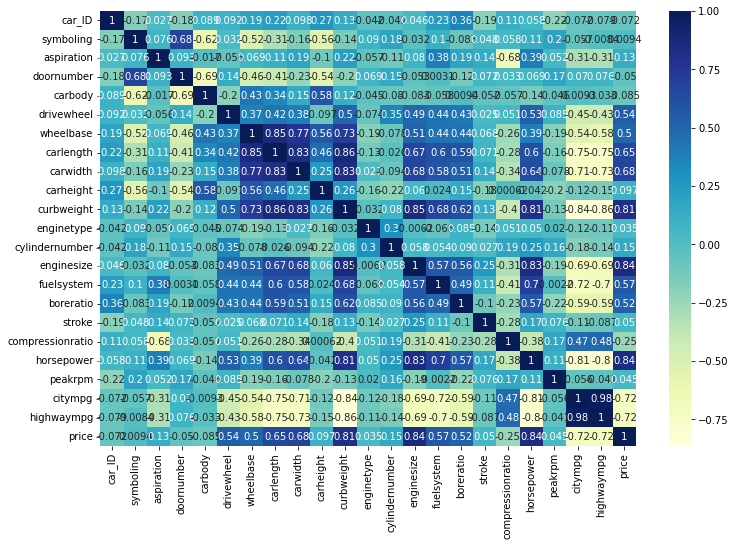

In [77]:
plt.figure(figsize= (12,8))
sns.heatmap(car.corr() , annot = True , cmap = "YlGnBu")

## f. Data Spliting


In [78]:
split_data = car.copy()

In [79]:
split_data.columns

Index(['car_ID', 'symboling', 'CarName', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [80]:
split_data = split_data[['doornumber','carbody','drivewheel', 'wheelbase', 'carlength','enginetype', 'cylindernumber',
                         'enginesize','boreratio','horsepower','peakrpm','highwaympg', 'price']]

In [81]:
split_data

,doornumber,carbody,drivewheel,wheelbase,carlength,enginetype,cylindernumber,enginesize,boreratio,horsepower,peakrpm,highwaympg,price
0,1,0,2,88.6,168.8,0,2,130,3.47,111,5000,27,13495.0
1,1,0,2,88.6,168.8,0,2,130,3.47,111,5000,27,16500.0
2,1,2,2,94.5,171.2,4,3,152,2.68,154,5000,26,16500.0
3,0,3,1,99.8,176.6,2,2,109,3.19,102,5500,30,13950.0
4,0,3,0,99.4,176.6,2,1,136,3.19,115,5500,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,4,2,104.3,188.8,2,2,130,3.62,162,5100,22,18950.0
200,0,3,2,109.1,188.8,2,2,141,3.78,114,5400,28,16845.0
201,0,3,2,109.1,188.8,2,2,141,3.78,160,5300,25,19045.0
202,0,3,2,109.1,188.8,4,3,173,3.58,134,5500,23,21485.0


In [82]:
x =split_data.drop(["price"],axis=1).values
y= split_data['price'].values

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [84]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# 3. Data Modeling

## i. Linear Regression

In [85]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [86]:
reg.score(x_train,y_train)

0.8265076688790642

In [87]:
reg.score(x_test,y_test)

0.6621412338223736

In [88]:
reg.intercept_

10558.06640870028

In [89]:
reg.coef_

array([-1850.06711061,  -757.42523249,  1058.62011872,  1060.67698436,
          37.74912324,   141.64353789,  -200.44902995,  3200.75023889,
        -139.51295837,  2778.69619452,  1119.24429936,  -912.5896207 ])

In [90]:
pd.DataFrame(reg.coef_ , split_data.columns[:-1] , columns=['Coeficient'])

,Coeficient
doornumber,-1850.067111
carbody,-757.425232
drivewheel,1058.620119
wheelbase,1060.676984
carlength,37.749123
enginetype,141.643538
cylindernumber,-200.449030
enginesize,3200.750239
boreratio,-139.512958
horsepower,2778.696195


In [91]:
y_pred = reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
0,6295.0,7080.207661
1,10345.0,10110.533886
2,11549.0,14002.416996
3,9279.0,12582.078410
4,8058.0,7534.671198
5,30760.0,23923.217890
6,6229.0,9216.093013
7,6189.0,7490.933229
8,37028.0,21967.773698
9,15040.0,12520.548396


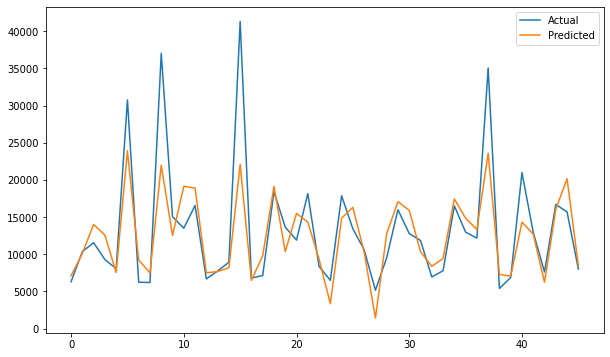

In [92]:
plt.figure(figsize=(10,6))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

### Evaluation of  Linear Regression

In [93]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.6621412338223736

In [94]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R2

0.6289092240344103

In [95]:
adj_R2 < reg_score

True

In [96]:
mse = mean_squared_error(y_test , y_pred)
mse

22646792.448474232

In [97]:
mae = mean_absolute_error(y_test , y_pred)
mae

2973.437351992182

In [98]:
mpae= mean_absolute_percentage_error(y_test,y_pred)
mpae

0.20787773437913798

In [99]:
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse= np.sqrt(reg_mse)

In [100]:
reg_rmse

4758.864617582038

## ii. Ridge Regression

In [101]:
reg = linear_model.Ridge(alpha=0.4)

In [102]:
reg.fit(x_train , y_train)

Ridge(alpha=0.4)

In [103]:
reg.score(x_test , y_test)

0.6612197735203842

In [104]:
reg.intercept_

10550.693194905125

In [105]:
reg.coef_

array([-1783.00952963,  -742.16166076,  1043.5959807 ,  1049.42065153,
          75.50883989,   138.75000407,  -184.37625131,  3181.92215495,
        -129.18805357,  2754.81364371,  1111.9352641 ,  -914.59170321])

In [106]:
pd.DataFrame(reg.coef_ , split_data.columns[:-1] , columns=['Coeficient'])

,Coeficient
doornumber,-1783.009530
carbody,-742.161661
drivewheel,1043.595981
wheelbase,1049.420652
carlength,75.508840
enginetype,138.750004
cylindernumber,-184.376251
enginesize,3181.922155
boreratio,-129.188054
horsepower,2754.813644


In [107]:
y_pred = reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
0,6295.0,7044.918236
1,10345.0,10102.911158
2,11549.0,13976.146060
3,9279.0,12510.958747
4,8058.0,7537.375991
5,30760.0,23829.846170
6,6229.0,9117.821143
7,6189.0,7458.984185
8,37028.0,21873.040275
9,15040.0,12514.241234


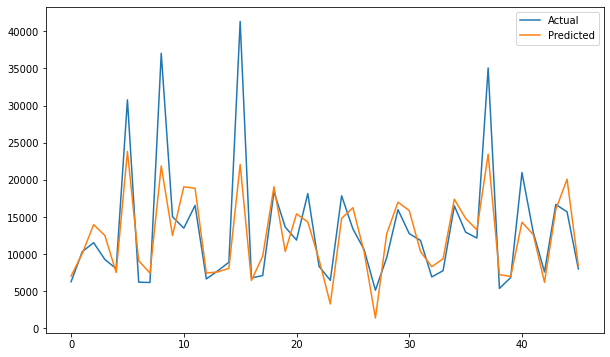

In [108]:
plt.figure(figsize=(10,6))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

### Evaluation of Ridge Regression

In [109]:
rid_score = r2_score(y_test , y_pred)
rid_score

0.6612197735203842

In [110]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-rid_score)*(n-1)/(n-p-1)
adj_R2

0.6278971282928809

In [111]:
adj_R2 < rid_score

True

In [112]:
mse = mean_squared_error(y_test , y_pred)
mse

22708558.25803056

In [113]:
mae = mean_absolute_error(y_test,y_pred)
mae

2961.2655257010333

In [114]:
mpae= mean_absolute_percentage_error(y_test,y_pred)
mpae

0.20601428077610154

In [115]:
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse= np.sqrt(reg_mse)

In [116]:
reg_rmse

4765.349751910196

## iii. Lasso Regression

In [117]:
reg = linear_model.Lasso(alpha=0.9)

In [118]:
reg.fit(x_train , y_train)

Lasso(alpha=0.9)

In [119]:
print(reg.score(x_train , y_train))
print(reg.score(x_test , y_test))

0.82650660475587
0.6619656903497882


In [120]:
print(reg.intercept_)
print(reg.coef_)

10556.082722178618
[-1837.40669951  -752.06263641  1050.35780242  1061.42800945
    38.3138054    138.00777224  -193.06683911  3200.9384762
  -131.49468148  2777.92693201  1118.08097886  -907.35227987]


In [121]:
pd.DataFrame(reg.coef_ , split_data.columns[:-1] , columns=['Coeficient'])
y_pred = reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
0,6295.0,7078.063191
1,10345.0,10111.357011
2,11549.0,13999.026277
3,9279.0,12570.104005
4,8058.0,7530.242290
5,30760.0,23916.464319
6,6229.0,9198.014097
7,6189.0,7485.522070
8,37028.0,21953.276587
9,15040.0,12505.577194


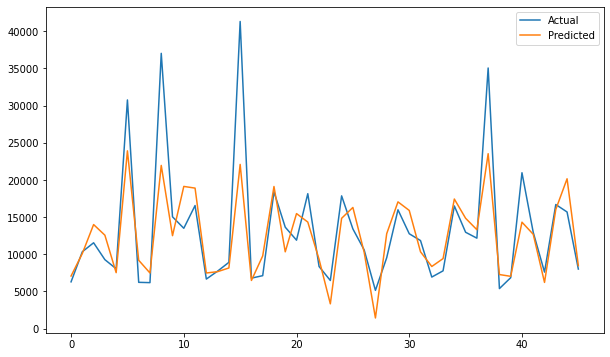

In [122]:
plt.figure(figsize=(10,6))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

### Evaluation of Lasso Regression

In [123]:
las_score = r2_score(y_test , y_pred)
las_score

0.6619656903497882

In [124]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-las_score)*(n-1)/(n-p-1)
adj_R2

0.6287164139907511

In [125]:
adj_R2 < las_score

True

In [126]:
mse = mean_squared_error(y_test,y_pred)
mse

22658559.189453904

In [127]:
mae = mean_absolute_error(y_test,y_pred)
mae

2972.114621373519

In [128]:
mpae= mean_absolute_percentage_error(y_test,y_pred)
mpae

0.20756739224230308

In [129]:
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse= np.sqrt(reg_mse)

In [130]:
reg_rmse

4760.100754128415

## iv. OLS Regression

In [131]:
x2 = sm.add_constant(x)
est= sm.OLS(y,x2)
est2= est.fit()

### Evaluation of OLS Regression

In [132]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     56.44
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.59e-52
Time:                        16:33:22   Log-Likelihood:                -1714.2
No. Observations:                 181   AIC:                             3454.
Df Residuals:                     168   BIC:                             3496.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.636e+04   1.26e+04     -2.884      0.004   -6.13e+04   -1.15e+04
x1         -1066.0280    726.975     -1.466      0.144   -2501.212     369.156
x2          -838.2249    433.662     -1.933      0.055   -1694.355      17.905
x3           856.6544    639.113      1.340      0.182    -405.072    2118.381
x4           149.6320     98.842      1.514      0.132     -45.501     344.765
x5            42.4616     56.720      0.749      0.455     -69.514     154.437
x6           448.8393    311.214      1.442      0.151    -165.555    1063.233
x7            64.0358    468.448      0.137      0.891    -860.767     988.839
x8            96.9097     16.161      5.996      0.000      65.005     128.815
x9          -676.5935   1307.782     -0.517      0.606   -3258.398    1905.211
x10           61.4241     18.705      3.284      0.001      24.497      98.352
x11            2.1167      0.714      2.964      0.003       0.707       3.527
x12            9.5738     82.766      0.116      0.908    -153.821     172.969
==============================================================================
Omnibus:                       18.068   Durbin-Watson:                   0.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.223
Skew:                           0.376   Prob(JB):                     2.50e-10
Kurtosis:                       5.302   Cond. No.                     2.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## v. Generalized Linear Model Regression

In [133]:
x2 = sm.add_constant(x)
est= sm.GLM(y,x2)
est2= est.fit()

### Evaluation of Generalized Linear Model Regression

In [134]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  181
Model:                            GLM   Df Residuals:                      168
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                      1.0616e+07
Method:                          IRLS   Log-Likelihood:                -1714.2
Date:                Thu, 08 Sep 2022   Deviance:                   1.7835e+09
Time:                        16:33:23   Pearson chi2:                 1.78e+09
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9764
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.636e+04   1.26e+04     -2.884      0.004   -6.11e+04   -1.16e+04
x1         -1066.0280    726.975     -1.466      0.143   -2490.873     358.817
x2          -838.2249    433.662     -1.933      0.053   -1688.187      11.738
x3           856.6544    639.113      1.340      0.180    -395.983    2109.292
x4           149.6320     98.842      1.514      0.130     -44.095     343.359
x5            42.4616     56.720      0.749      0.454     -68.707     153.630
x6           448.8393    311.214      1.442      0.149    -161.129    1058.808
x7            64.0358    468.448      0.137      0.891    -854.105     982.177
x8            96.9097     16.161      5.996      0.000      65.234     128.585
x9          -676.5935   1307.782     -0.517      0.605   -3239.800    1886.613
x10           61.4241     18.705      3.284      0.001      24.763      98.085
x11            2.1167      0.714      2.964      0.003       0.717       3.516
x12            9.5738     82.766      0.116      0.908    -152.644     171.792
==============================================================================
"""

## vi. WLS Regression 

In [135]:
x2 = sm.add_constant(x)
est= sm.WLS(y,x2)
est2= est.fit()

In [136]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            WLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     56.44
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.59e-52
Time:                        16:33:23   Log-Likelihood:                -1714.2
No. Observations:                 181   AIC:                             3454.
Df Residuals:                     168   BIC:                             3496.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.636e+04   1.26e+04     -2.884      0.004   -6.13e+04   -1.15e+04
x1         -1066.0280    726.975     -1.466      0.144   -2501.212     369.156
x2          -838.2249    433.662     -1.933      0.055   -1694.355      17.905
x3           856.6544    639.113      1.340      0.182    -405.072    2118.381
x4           149.6320     98.842      1.514      0.132     -45.501     344.765
x5            42.4616     56.720      0.749      0.455     -69.514     154.437
x6           448.8393    311.214      1.442      0.151    -165.555    1063.233
x7            64.0358    468.448      0.137      0.891    -860.767     988.839
x8            96.9097     16.161      5.996      0.000      65.005     128.815
x9          -676.5935   1307.782     -0.517      0.606   -3258.398    1905.211
x10           61.4241     18.705      3.284      0.001      24.497      98.352
x11            2.1167      0.714      2.964      0.003       0.707       3.527
x12            9.5738     82.766      0.116      0.908    -153.821     172.969
==============================================================================
Omnibus:                       18.068   Durbin-Watson:                   0.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.223
Skew:                           0.376   Prob(JB):                     2.50e-10
Kurtosis:                       5.302   Cond. No.                     2.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# THE END 